In [32]:
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression  # For Logistic Regression
from sklearn.ensemble import RandomForestClassifier # For RFC
from sklearn.svm import SVC                               #For SVM
from sklearn.metrics import matthews_corrcoef    
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score,roc_curve,auc
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn import metrics
sns.set(style="ticks", color_codes=True)

In [33]:
df = pd.read_csv("combined_dataset.csv")
df.head()

,domain,ranking,isIp,valid,activeDuration,urlLen,is@,isredirect,haveDash,domainLen,nosOfSubdomain,label
0,www.voting-yahoo.com,10000000,0,0,0,20,0,0,1,20,2,1
1,www.zvon.org/xxl/WSDL1.1/Output/index.html,194914,0,1,7305,42,0,0,0,12,2,0
2,tecportais.com/file-security-update-infonfmati...,10000000,0,0,0,155,0,0,0,14,1,1
3,bima.astro.umd.edu/nemo/linuxastro/,7001,0,0,0,35,0,0,0,18,3,0
4,huarui-tec.com/js/?us.battle.net/login/en/?ref...,10000000,0,1,730,79,0,0,1,14,1,1


In [34]:
inputs = df.drop(['label', 'domain'], axis=1)
outputs = df.label

In [35]:
x_train, x_test, y_train, y_test = train_test_split(inputs, outputs, test_size=0.25)
print("Training set has {} samples.".format(x_train.shape[0]))
print("Testing set has {} samples.".format(x_test.shape[0]))

Training set has 71932 samples.
Testing set has 23978 samples.


In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
#Random Search
import numpy as np 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

random_search = {'criterion': ['entropy', 'gini'],
               'max_depth': list(np.linspace(10, 1200, 10, dtype = int)) + [None],
               'max_features': ['auto', 'sqrt','log2', None],
               'min_samples_leaf': [4, 6, 8, 12],
               'min_samples_split': [5, 7, 10, 14],
               'n_estimators': list(np.linspace(151, 1200, 10, dtype = int))}

clf = RandomForestClassifier()
model = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 80, 
                               cv = 2, verbose= 5, random_state= 101, n_jobs = -1)
model.fit(x_train,y_train)


Fitting 2 folds for each of 80 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  9.8min finished


In [38]:
y_pred_rfc = model.predict(x_test)


In [39]:
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_rfc)))
print('Precision Score : ' + str(metrics.precision_score(y_test,y_pred_rfc)))
print('Recall Score : ' + str(metrics.recall_score(y_test,y_pred_rfc)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_rfc)))

Accuracy Score : 0.9499541246142297
Precision Score : 0.9529687167482443
Recall Score : 0.9615632381361392
F1 Score : 0.957246686618213


f1 score is  0.9499079227431265
matthews correlation coefficient is  0.8969642741689304
The accuracy Random forest classifier on testing data is:  94.99541246142297


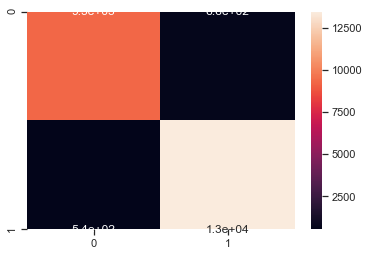

In [40]:
cm=confusion_matrix(y_test,y_pred_rfc)
sns.heatmap(cm,annot=True)
print("f1 score is ",f1_score(y_test,y_pred_rfc,average='weighted'))
print("matthews correlation coefficient is ",matthews_corrcoef(y_test,y_pred_rfc))
print("The accuracy Random forest classifier on testing data is: ",100.0 *accuracy_score(y_test,y_pred_rfc))

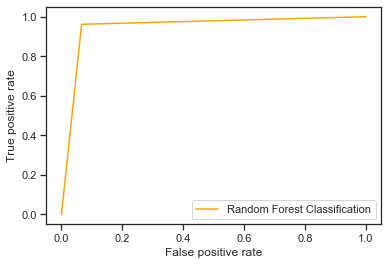

In [41]:
fpr,tpr,thresh = roc_curve(y_test,y_pred_rfc)
roc_auc = accuracy_score(y_test,y_pred_rfc)

# Plot ROC curve for Logistic Regression
plt.plot(fpr,tpr,'orange',label = 'Random Forest Classification')
plt.legend("Logistic Regression", loc='lower right')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend(loc='lower right')

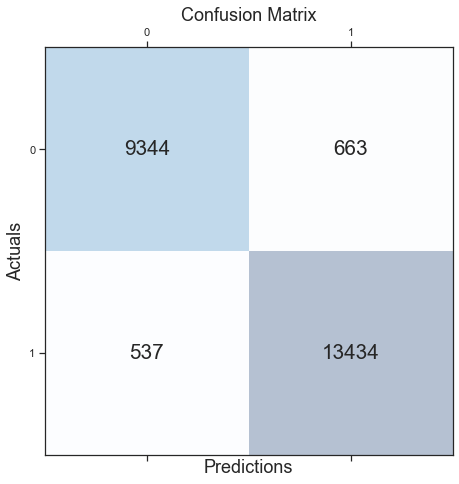

In [42]:
cm=confusion_matrix(y_test,y_pred_rfc)
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred_rfc)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [17]:
#create RFC object
RFClass = RandomForestClassifier()

In [19]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [20]:
CV_rfc = GridSearchCV(estimator=RFClass, param_grid=param_grid, cv= 5)
CV_rfc.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [21]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 500}

In [24]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 500, max_depth=8, criterion='gini')
rfc1.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=8, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

f1 score is  0.9265187881043371
matthews correlation coefficient is  0.8488412275709855
The accuracy Random forest classifier on testing data is:  92.6807907248311


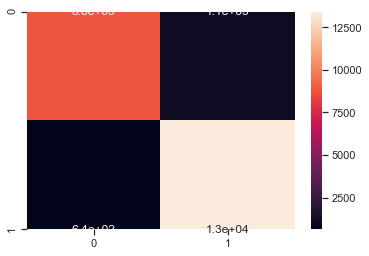

In [25]:
y_pred_rfc = rfc1.predict(x_test)

cm=confusion_matrix(y_test,y_pred_rfc)
sns.heatmap(cm,annot=True)
print("f1 score is ",f1_score(y_test,y_pred_rfc,average='weighted'))
print("matthews correlation coefficient is ",matthews_corrcoef(y_test,y_pred_rfc))
print("The accuracy Random forest classifier on testing data is: ",100.0 *accuracy_score(y_test,y_pred_rfc))

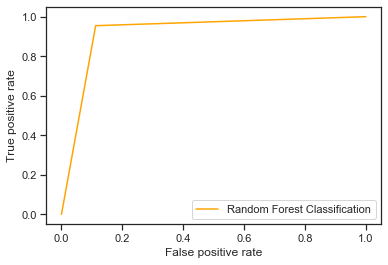

In [26]:
fpr,tpr,thresh = roc_curve(y_test,y_pred_rfc)
roc_auc = accuracy_score(y_test,y_pred_rfc)

# Plot ROC curve for Logistic Regression
plt.plot(fpr,tpr,'orange',label = 'Random Forest Classification')
plt.legend("Logistic Regression", loc='lower right')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend(loc='lower right')

In [27]:
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_rfc)))
print('Precision Score : ' + str(metrics.precision_score(y_test,y_pred_rfc)))
print('Recall Score : ' + str(metrics.recall_score(y_test,y_pred_rfc)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_rfc)))

Accuracy Score : 0.926807907248311
Precision Score : 0.9231457888575167
Recall Score : 0.9545001424095699
F1 Score : 0.9385611762646595


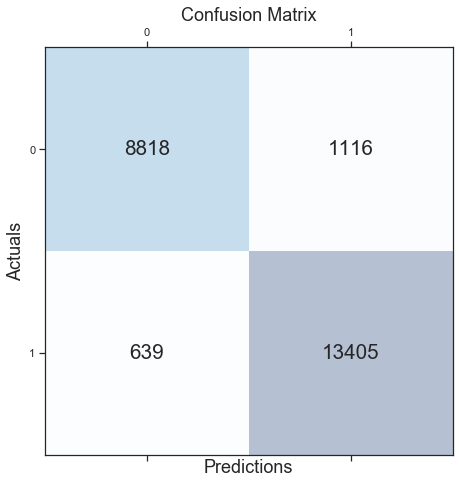

In [28]:
cm=confusion_matrix(y_test,y_pred_rfc)
# sns.heatmap(cm,annot=True)
# print(cm)
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred_rfc)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

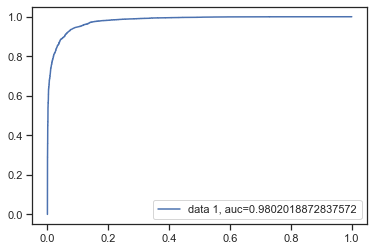

In [30]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics
y_pred_proba = rfc1.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_rfc))

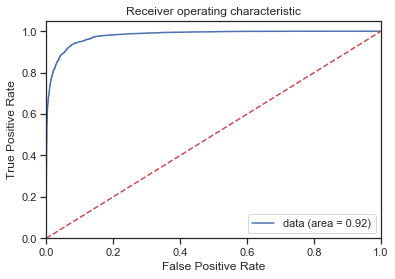

In [31]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, rfc1.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, rfc1.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='data (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()